In [ ]:
# abrir um endereço em um navegador
import webbrowser
webbrowser.open('http://inventwithpython.com')

In [ ]:
# abrir uma busca do google maps
import webbrowser
endereco = 'Rua Antônia de Lima Paiva, 155 - Bairro Nova Esperança, Parnamirim RN'
webbrowser.open('https://www.google.com.br/maps/place/' + endereco)

In [ ]:
# conda install -c conda-forge requests
# pip3 install requests

In [ ]:
# exibir a página de um site (uma alternativa ao urllib)
import requests
try:
    response = requests.get('http://www.ifrn.edu.br')
    response.raise_for_status()
    print(response.text)
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
# salvar um arquivo localmente
# mesmo sendo texto, é importante gravar o arquivo como binário, para preservar a codificação Unicode
# o método iter_content retorna porções do conteúdo em bytes a cada iteração. 
# Segundo a documentação, cem mil é um bom tamanho sugerido como parâmetro.
import requests
try:
    response = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt')
    response.raise_for_status()
    file = open('RomeoAndJuliet.txt', 'wb')
    for dados in response.iter_content(100000):
        file.write(dados)
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
# fazendo parse de HTML
import requests
from bs4 import BeautifulSoup as bs
try:
    html = requests.get('http://www.pythonscraping.com/pages/page1.html')
    html.raise_for_status()
    print(html.text)
    soup = bs(html.text)
    print(soup.h1)
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
# fazendo parse de HTML
import requests
from bs4 import BeautifulSoup as bs
try:
    html = requests.get('https://nostarch.com/')
    # html = open('example.html') <-- caso queira carregar de um arquivo local
    html.raise_for_status()
    soup = bs(html.text)
    books = soup.select('.field-item.even img')
    #print(len(books))
    #print(type(books))
    #print(books[0])
    #print(books[0].attrs)
    #print(books[0]['alt'])
    for book in books:
        print(book)
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
for book in books:
    print('- ', book['src'])

In [ ]:
# fazendo parse de HTML
import requests
from bs4 import BeautifulSoup as bs
try:
    html = requests.get('https://nostarch.com/')
    html.raise_for_status()
    soup = bs(html.text)
    books = soup.select('.field-item.even a')
    for book in books:
        print(book.getText())
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
# fazendo parse de HTML
import requests
from bs4 import BeautifulSoup as bs
try:
    html = requests.get('http://www.pythonscraping.com/pages/warandpeace.html')
    html.raise_for_status()
    soup = bs(html.text)
    green_texts = soup.select('.green')
    for green in green_texts:
        print(green.getText())
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
import requests
import webbrowser
from bs4 import BeautifulSoup as bs

query = 'beautiful+soup'
search = 'http://google.com/search?q={}'.format(query)
print('Busca: %s \n' % search)
try:
    response = requests.get(search)
    response.raise_for_status()
    soup = bs(response.text)
    
    links = soup.select('.jfp3ef a')
    for link in links:
        print('- %s \n' % link['href'])
    
    numOpens = min(5, len(links))
    for i in range(numOpens):
        webbrowser.open('http://google.com' + links[i]['href'])
except Exception as err:
    print('Problem - %s' % err)

In [ ]:
# Download das tirinhas do XKCD
import requests, os, bs4

url = 'http://xkcd.com'
os.makedirs('xkcd', exist_ok=True)
while not url.endswith('#'):
    print('Baixando página %s' % url)
    
    response = requests.get(url)
    response.raise_for_status()
    soup = bs4.BeautifulSoup(response.text)
    
    comicImg = soup.select('#comic img')
    if comicImg == []:
        print('Não é possível encontrar imagem.')
    else:
        comicUrl = 'http:' + comicImg[0]['src']        
        print('Baixando imagem %s' % comicUrl)
        response = requests.get(comicUrl)
        response.raise_for_status()
    
    imageFile = open(os.path.join('xkcd', os.path.basename(comicUrl)), 'wb')
    for dados in response.iter_content(100000):
        imageFile.write(dados)
    imageFile.close()
    
    prevLink = soup.select('a[rel="prev"]')[0]
    url = 'http://xkcd.com' + prevLink['href']
print('Feito.')

In [ ]:
# Controlando o navegador com Selenium
from selenium import webdriver

#browser = webdriver.Firefox('/Users/givanaldo/Downloads/DMGs/geckodriver')
browser = webdriver.Chrome('/Users/givanaldo/Downloads/DMGs/chromedriver')
browser.get('http://inventwithpython.com')

In [ ]:
from selenium import webdriver
browser = webdriver.Chrome('/Users/givanaldo/Downloads/DMGs/chromedriver')
browser.get('http://inventwithpython.com')
try:
    elemento = browser.find_element_by_class_name('cover-thumb')
    print('Elemento <%s> encontrado.' % elemento.tag_name)
except:
    print('Elemento não encontrado')

In [ ]:
from selenium import webdriver
browser = webdriver.Chrome('/Users/givanaldo/Downloads/DMGs/chromedriver')
browser.get('http://inventwithpython.com')
try:
    link = browser.find_element_by_link_text('Read Online for Free')
    link.click()
except:
    print('Elemento não encontrado')

In [ ]:
from selenium import webdriver
from time import sleep

browser = webdriver.Chrome('/Users/givanaldo/Downloads/DMGs/chromedriver')
browser.get('https://login.live.com')
try:
    email = browser.find_element_by_name('loginfmt')
    email.send_keys('givanaldoifrn@hotmail.com')
    sleep(3)
    proximo = browser.find_element_by_id('idSIButton9')
    proximo.click()
    sleep(3)
    password = browser.find_element_by_name('passwd')
    password.send_keys('senha@ifrn')
    password.submit()
except:
    print('Elemento não encontrado')

# Usando Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# permite plotar os gráficos dentro do ambiente jupyter
%matplotlib inline

### Series
Array unidimensional, uma lista de valores. Toda série possui um índice que dá rótulos a cada elemento da lista. 

In [2]:
# criando uma série
notas = pd.Series([2,7,5,10,6])
notas

0     2
1     7
2     5
3    10
4     6
dtype: int64

In [ ]:
print(notas.values)
print(notas.index)

In [ ]:
notas = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])
notas

In [ ]:
print(notas.values)
print(notas.index)
print(notas['Harry'])

In [ ]:
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())

In [ ]:
notas.describe()

### Dataframe
Estrutura bidimensional de dados, como uma planilha.

In [3]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
df["Seminário"]

In [ ]:
df.describe()

In [ ]:
df.sort_values(by="Seminário")

In [ ]:
print(df)
df.loc[3]

In [ ]:
df[df["Seminário"] > 8.0]

Este tipo de indexação também possibilita checar condições de múltiplas colunas. Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, &, |, ~ ao invés de and, or, not, respectivamente.

In [ ]:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

### Leitura de dados
O pandas fornece uma série de funcionalidades de leitura de dados, pros mais diversos formatos estruturais de dados, entre eles estão:
* pd.read_csv, para ler arquivos .csv, formato comum de armazenar dados de tabelas
* pd.read_xlsx, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.
* pd.read_html, para ler tabelas diretamente de um website

In [4]:
url = 'https://raw.githubusercontent.com/mvinoba/notebooks-for-binder/master/dados.csv'
df = pd.read_csv(url)
df

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


In [5]:
# Exibe as n primeiras linhas do dataframe (padrão -> n = 5)
# df.head(n=10)
df.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [ ]:
# Exibe as n últimas linhas do dataframe (padrão -> n = 5)
# df.tail(n=10)
df.tail()

In [6]:
print(df["bairro"].unique())

['Botafogo' 'Copacabana' 'Gávea' 'Grajaú' 'Ipanema' 'Leblon' 'Tijuca']


In [7]:
# contagem de ocorrências
df["bairro"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

In [8]:
# ocorrências normalizadas em porcentagem
df["bairro"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

In [9]:
# função de agrupamento
# objeto GroupBy com informação das médias agrupadas pelos valores da coluna bairros.
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


In [10]:
# Obter os valores da média do preço do metro quadrado em ordem crescente
df.groupby("bairro").mean()["pm2"].sort_values()

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

In [11]:
# aplicar funções a parte do dataframe

def truncar(bairro):
    return bairro[:3]
df["bairro"].apply(truncar)

# ou usando lambda

df["bairro"].apply(lambda x: x[:3])

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
5       Bot
6       Bot
7       Bot
8       Bot
9       Bot
10      Bot
11      Bot
12      Bot
13      Bot
14      Bot
15      Bot
16      Bot
17      Bot
18      Bot
19      Bot
20      Bot
21      Bot
22      Bot
23      Bot
24      Bot
25      Bot
26      Bot
27      Bot
28      Bot
29      Bot
       ... 
1967    Tij
1968    Tij
1969    Tij
1970    Tij
1971    Tij
1972    Tij
1973    Tij
1974    Tij
1975    Tij
1976    Tij
1977    Tij
1978    Tij
1979    Tij
1980    Tij
1981    Tij
1982    Tij
1983    Tij
1984    Tij
1985    Tij
1986    Tij
1987    Tij
1988    Tij
1989    Tij
1990    Tij
1991    Tij
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

In [ ]:
# substituir um valor por outro, no exemplo, por NaN (not a number))
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

In [ ]:
# eliminar valores NaN
df2.dropna()

In [ ]:
# pode substituir NaN por outro valor
df2.fillna(99)

In [ ]:
# indicar quem é que não é NaN
df2.isna()

### Visualização de dados
Os métodos de visualização do pandas são construídos com base no matplotlib para exploração rápida dos dados. 
Para se ter mais liberdade no conteúdo e possibilidades de visualização, recomenda-se usar diretamente o matplotlib ou ainda, para visualização estatística, o seaborn. 

Tanto Series como DataFrame possuem um método .plot(), que também é um atributo e pode ser encadeado para gerar visualização de diversos tipos, como histograma, área, pizza e dispersão, com respectivamente .hist(), .area(), .pie() e .scatter(), além de vários outros.

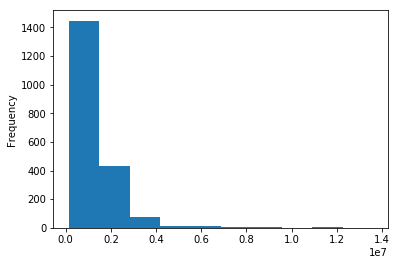

In [12]:
# distribuição dos preços usando o encadeamento .plot.hist(), o eixo x, que é o preço, está numa escala de *10^7.
df["preco"].plot.hist()

Por padrão esse método usa 10 bins, ou seja, divide os dados em 10 partes, mas é possível especificar um valor para a plotagem. Abaixo, além de especificar a quantidade de bins, também foi especificada a cor das bordas como preta, que por padrão é transparente.

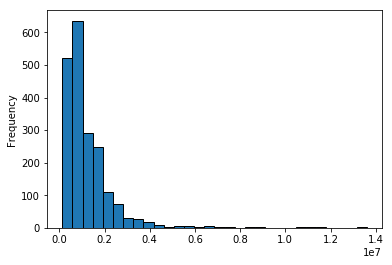

In [13]:
df["preco"].plot.hist(bins=30, edgecolor='black')

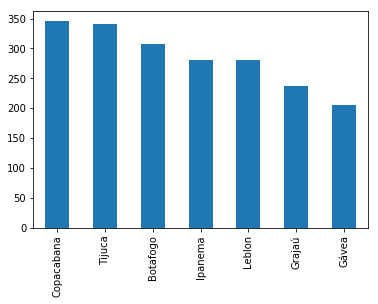

In [14]:
# gráfico de barras com a quantidade de bairros
df["bairro"].value_counts().plot.bar()

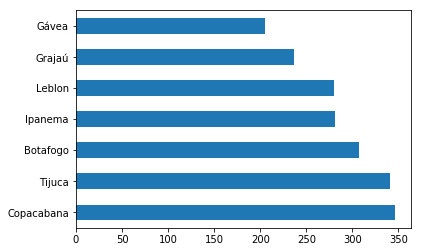

In [15]:
df["bairro"].value_counts().plot.barh()

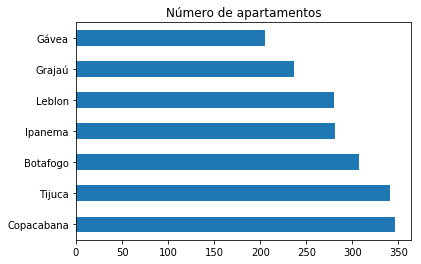

In [16]:
df["bairro"].value_counts().plot.barh(title="Número de apartamentos")

Um gráfico de dispersão usando um DataFrame pode ser usado especificando-se quais colunas usar como dados no eixo x e y.

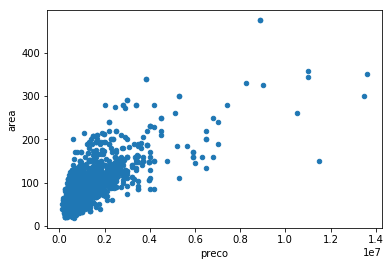

In [17]:
df.plot.scatter(x='preco', y='area')

Para fins estéticos, o matplotlib fornece uma série de styles diferentes que podem ser usados, um deles é o ggplot.

In [18]:
plt.style.use('ggplot')

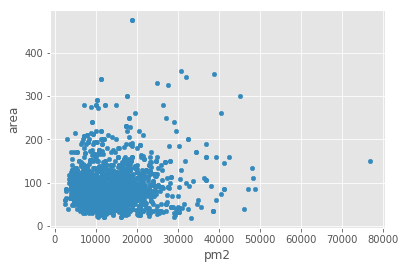

In [19]:
df.plot.scatter(x='pm2', y='area')

In [20]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

A coluna de quartos diz quantos quartos tem um determinado apartamento, também se pode ver a contagem e distribuição usando outros métodos de plotagem oferecidos pelo pandas.

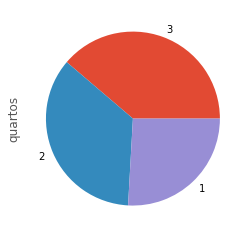

In [21]:
df["quartos"].value_counts().plot.pie()

Uma coisa a se notar do gráfico de scatter é a poluição causada pela enorme quantidade de dados agrupadas num dos cantos do gráfico, além de podermos diminuir o tamanho dos pontos passando o argumento s ao método .scatter podemos também usar um método do pandas que cria uma amostragem aleatória dos dados.

O .sample pode receber tanto um argumento frac, que determina uma fração dos itens que o método retornará (no caso abaixo, 10%), ou n, que determina um valor absoluto de itens.

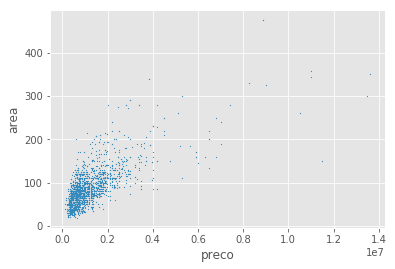

In [22]:
df.plot.scatter(x='preco', y='area', s=.5)

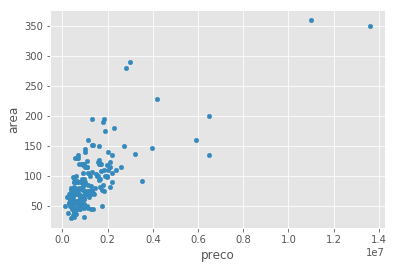

In [23]:
df.sample(frac=.1).plot.scatter(x='preco', y='area')

In [24]:
# salvar um dataframe
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df.to_csv("aulas.csv")
pd.read_csv("aulas.csv")

,Unnamed: 0,Aluno,Faltas,Prova,Seminário
0,0,Wilfred,3,2,8.5
1,1,Abbie,4,7,7.5
2,2,Harry,2,5,9.0
3,3,Julia,1,10,7.5
4,4,Carrie,4,6,8.0
